In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Importing Liabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Data Loading

In [4]:
train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# train_data -> Is the variable that stores our train data set
# test_data -> Is the variable that stores our test data set

**Lets check the shape of the dataset to verify that the data is loded correctly and we will use the `shape` function for that .**

In [5]:
print(train_data.shape)
test_data.shape
# The train data contains the labels also that's why we have one more column .

(20000, 22)


(5000, 21)

**Now let's check the info of the dataset and will use the pandas inbuilt function called `info()` and it will return the info that contains column name , datatype and no of null values .**

In [6]:
#train_data.info()

# EDA

**Now lets see the data and for this will use the `head()` function that will return the first five rows of the dataset .**

In [7]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [8]:
train_data.tail()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order
19999,DALTON AV,VERNON AV,34.0037,-118.3034,02/18/2020 12:00:00 AM,02/17/2020 12:00:00 AM,1800.0,3.0,Southwest,397.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


**Now let's check the info of the dataset and will use the pandas inbuilt function called `info()` and it will return the info that contains column name , datatype and no of null values .**

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [10]:
#test_data.info()

**Checking for the missing values and for this will use `isnull()` function .**

In [11]:
train_data.isnull().sum()
#train_data.isna() # Returns boolean value .

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

**Checking the statistic of the data set to get the insight . For this will use the `describe()` function .**

In [12]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


## Visualizing key statistics and relationships in the data .

**Histogram of Numerical features**

In [13]:
n_features = train_data.select_dtypes(include=['float64']).columns

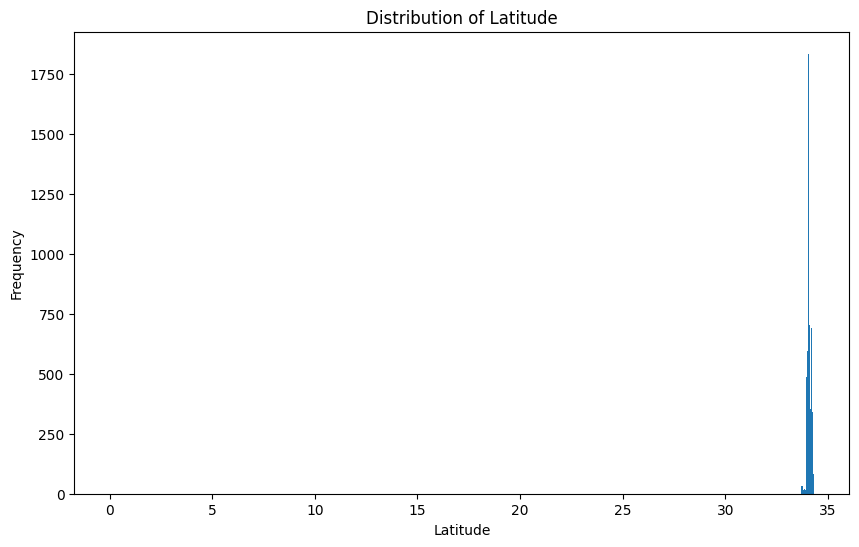

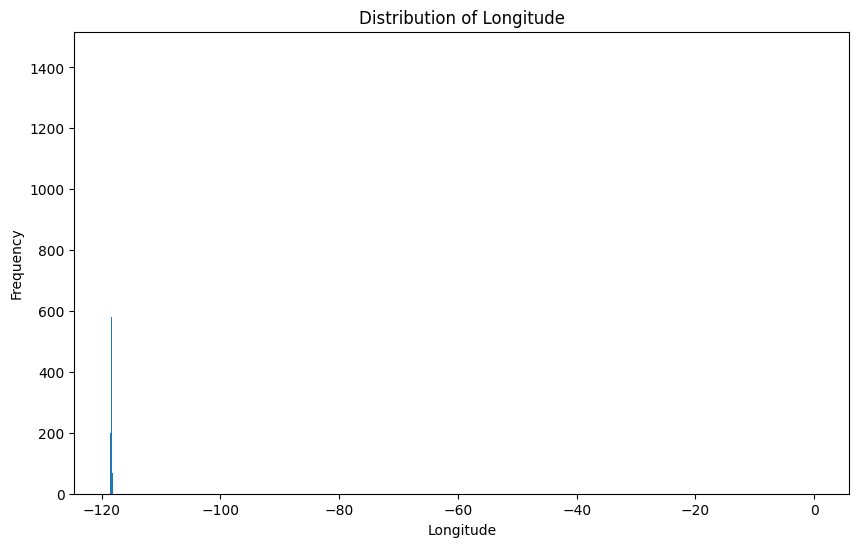

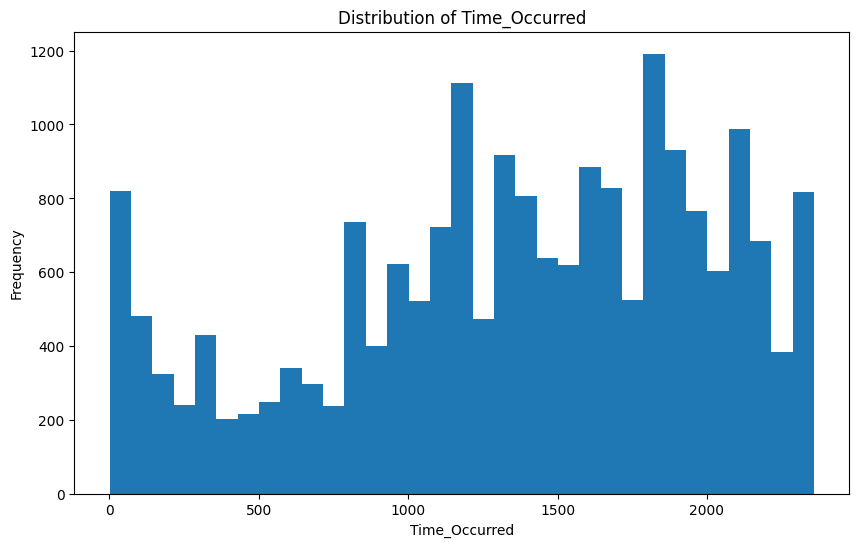

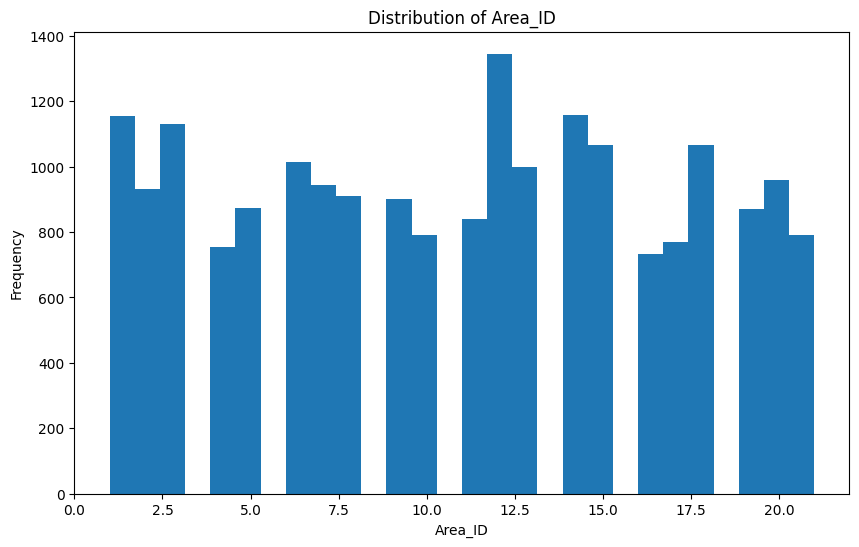

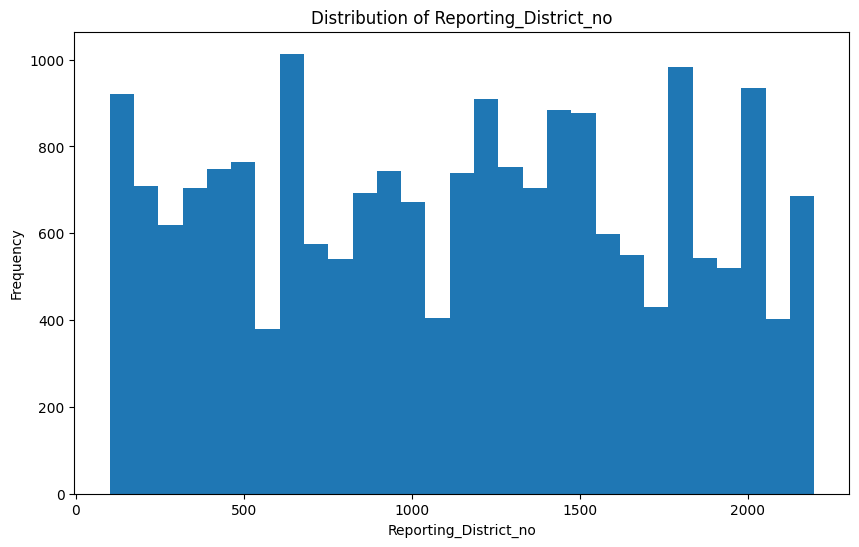

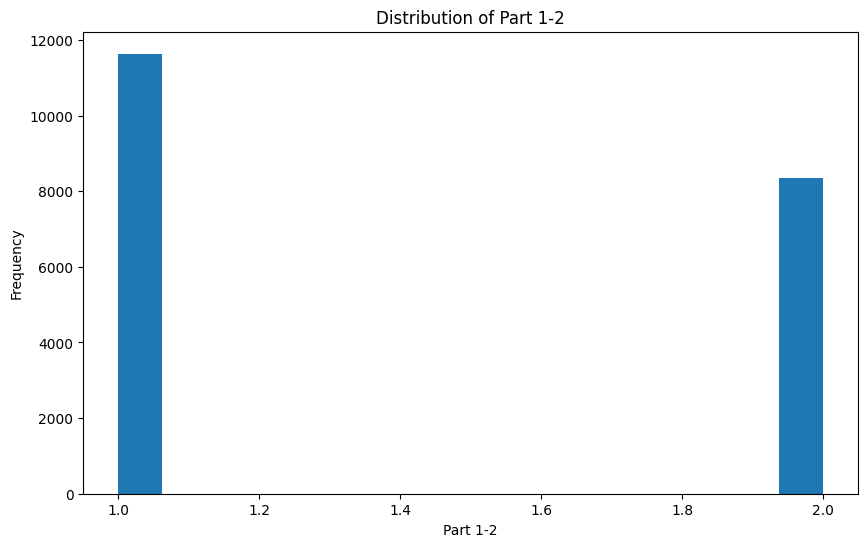

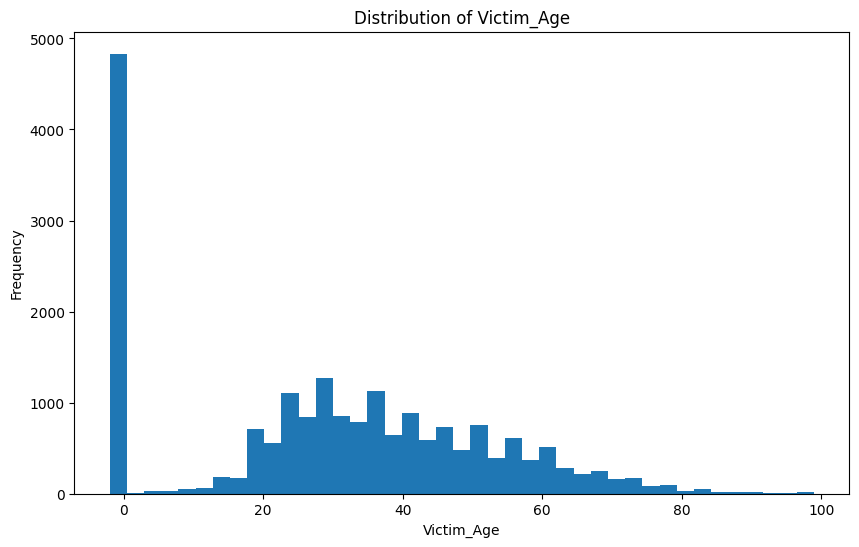

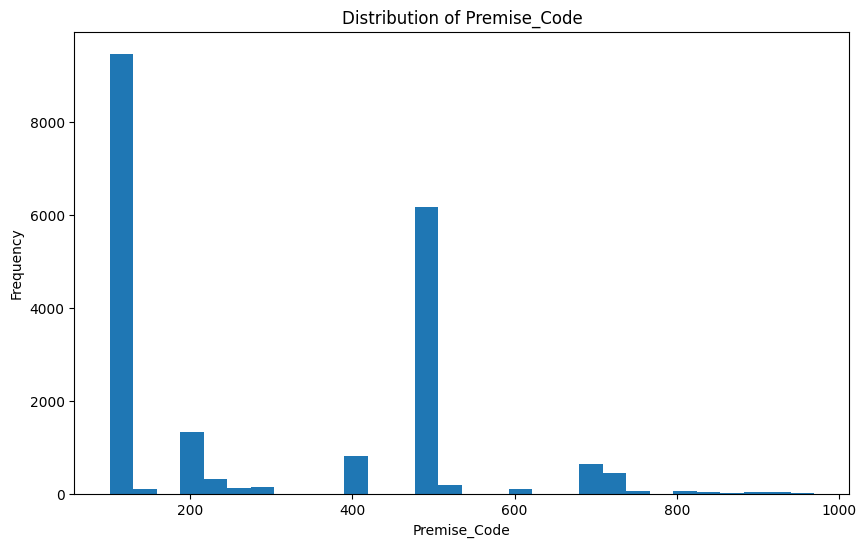

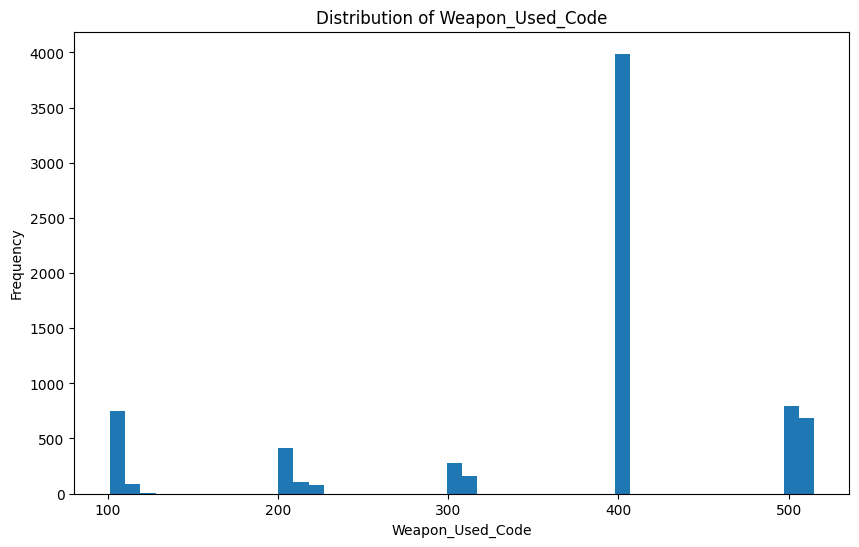

In [14]:
for feature in n_features:
    plt.figure(figsize=(10, 6))
    plt.hist(train_data[feature], bins='auto')# , edgecolor='k' , color = "lightcoral")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


**Box Plot for Numerical Features**

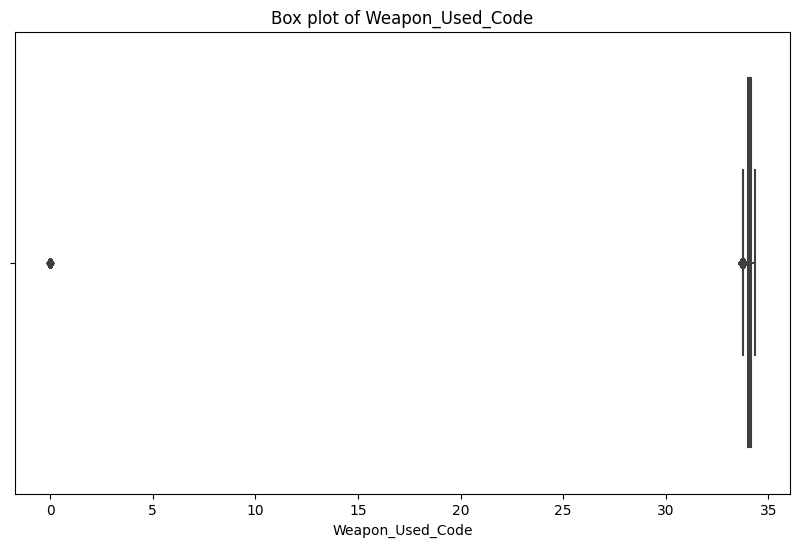

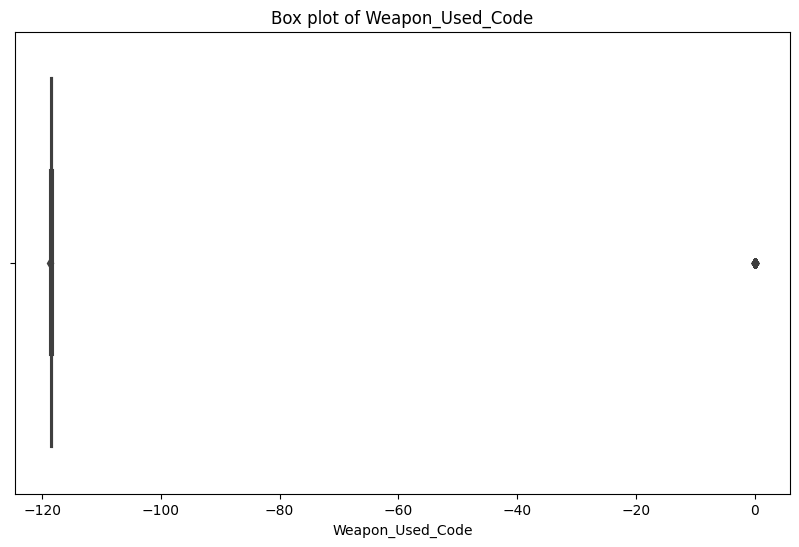

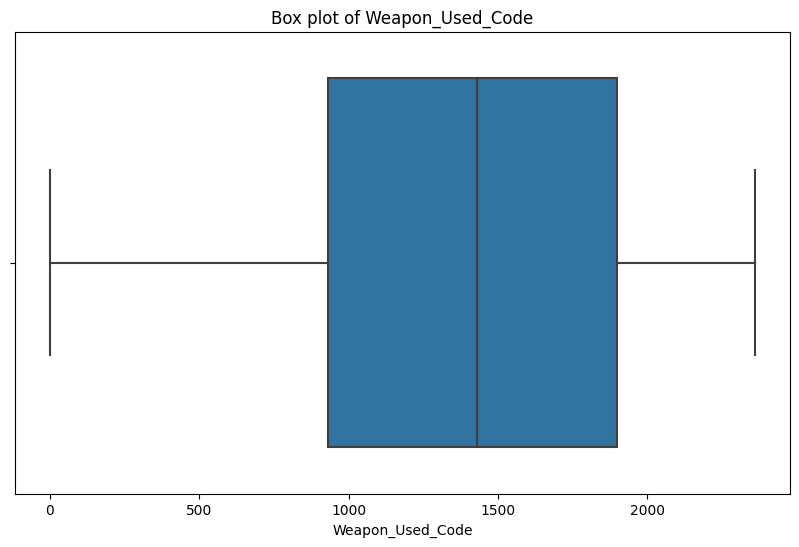

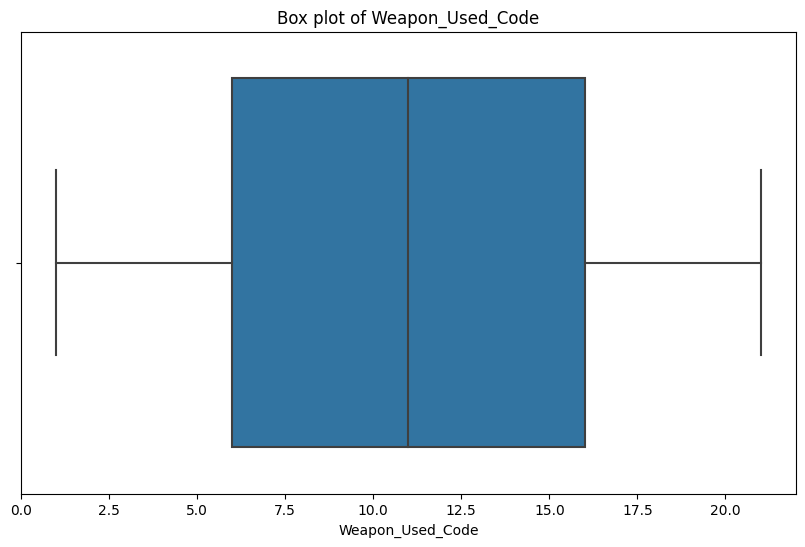

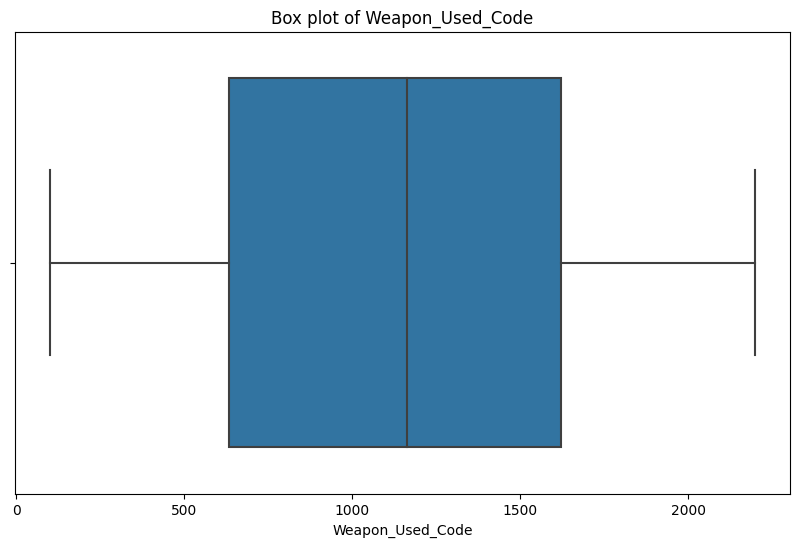

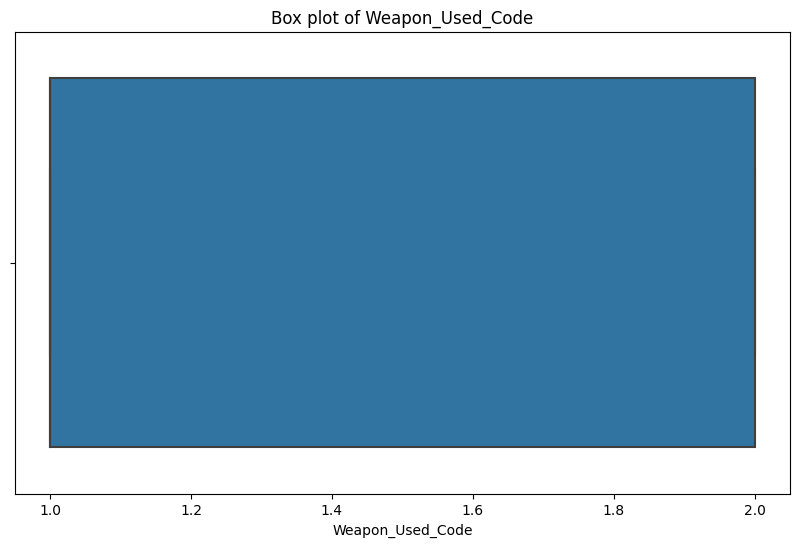

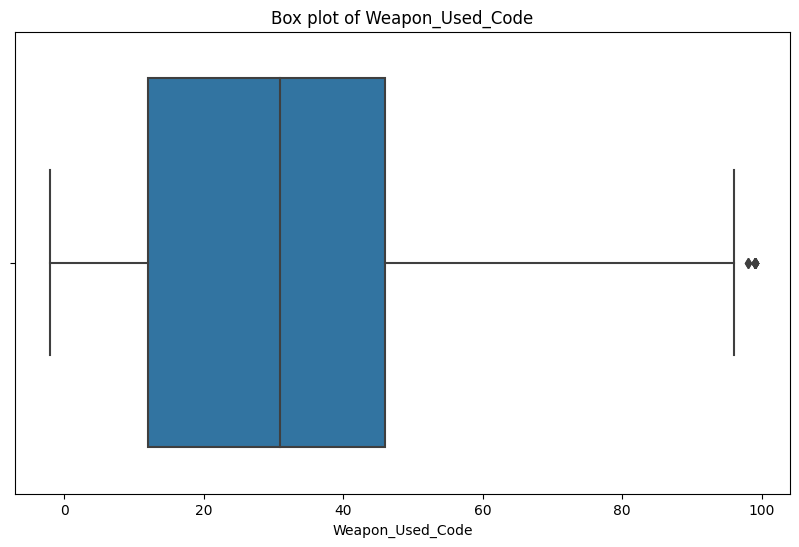

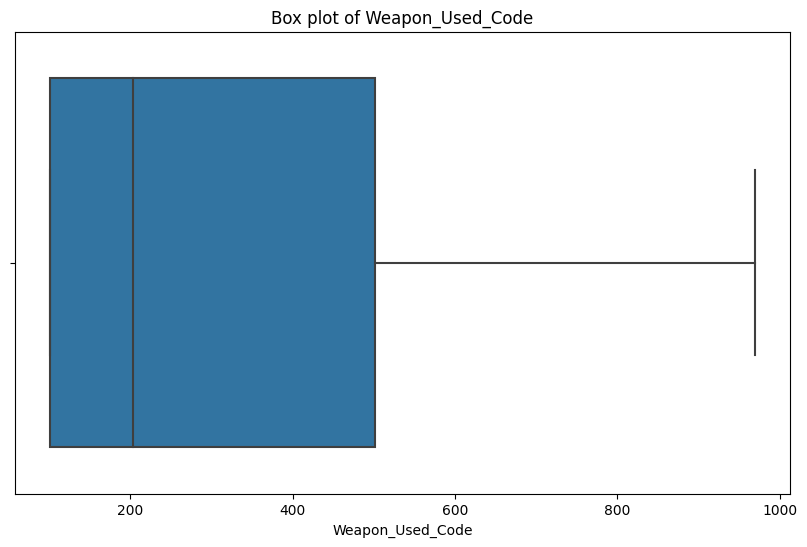

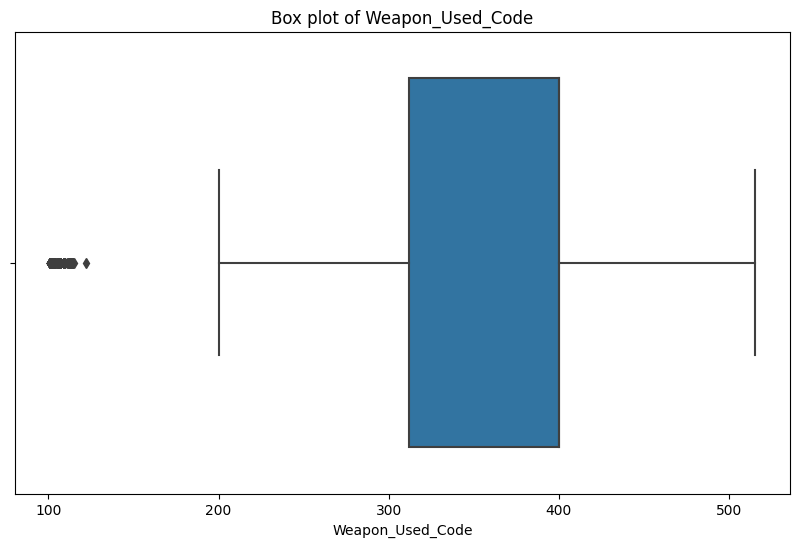

In [15]:
for i in n_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[i]) # n_features
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.show()

# No takeaways , remove 

**Categorical Data**

In [16]:
c_features = train_data.select_dtypes(include=['object']).columns

**Distribution for Categorical Data**

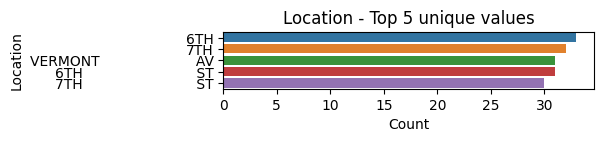

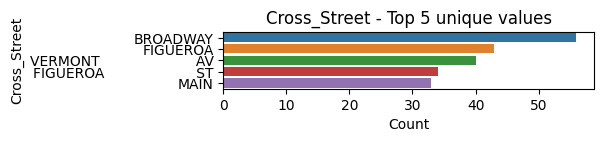

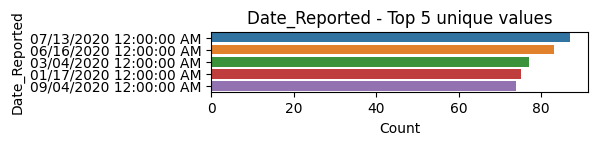

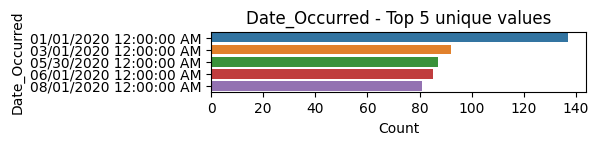

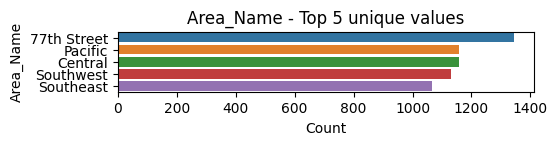

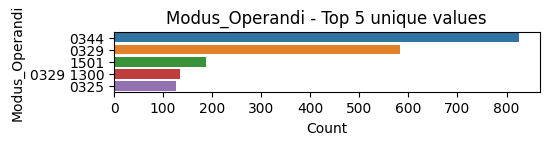

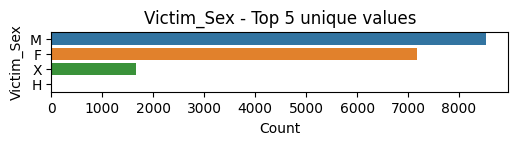

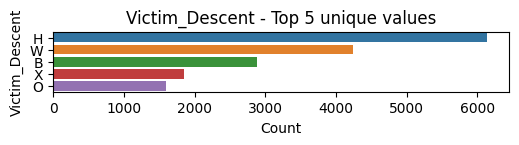

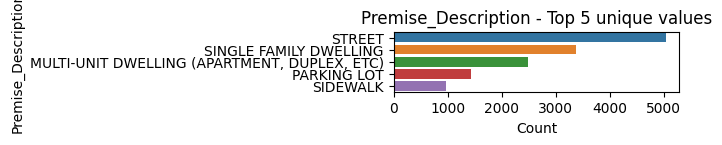

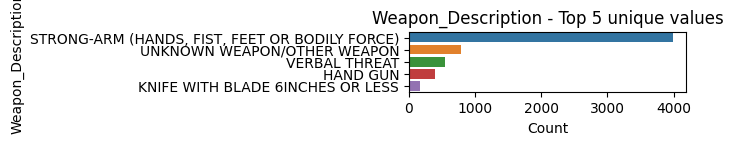

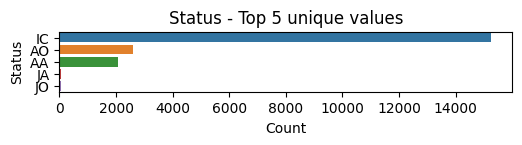

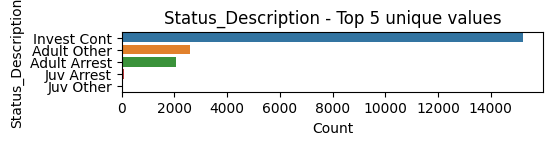

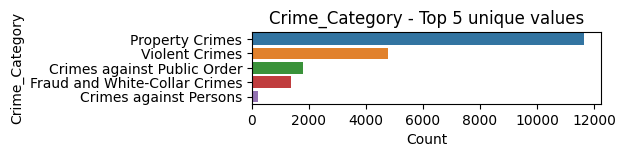

In [17]:
for i, col in enumerate(c_features , 1):
    plt.figure(figsize=(10, 8))
    plt.subplot(len(c_features) // 2 + 1, 2, i)
    sns.countplot(y=col, data=train_data, order=train_data[col].value_counts().index[:5])
    plt.title(f'{col} - Top 5 unique values')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Correlation Matrix

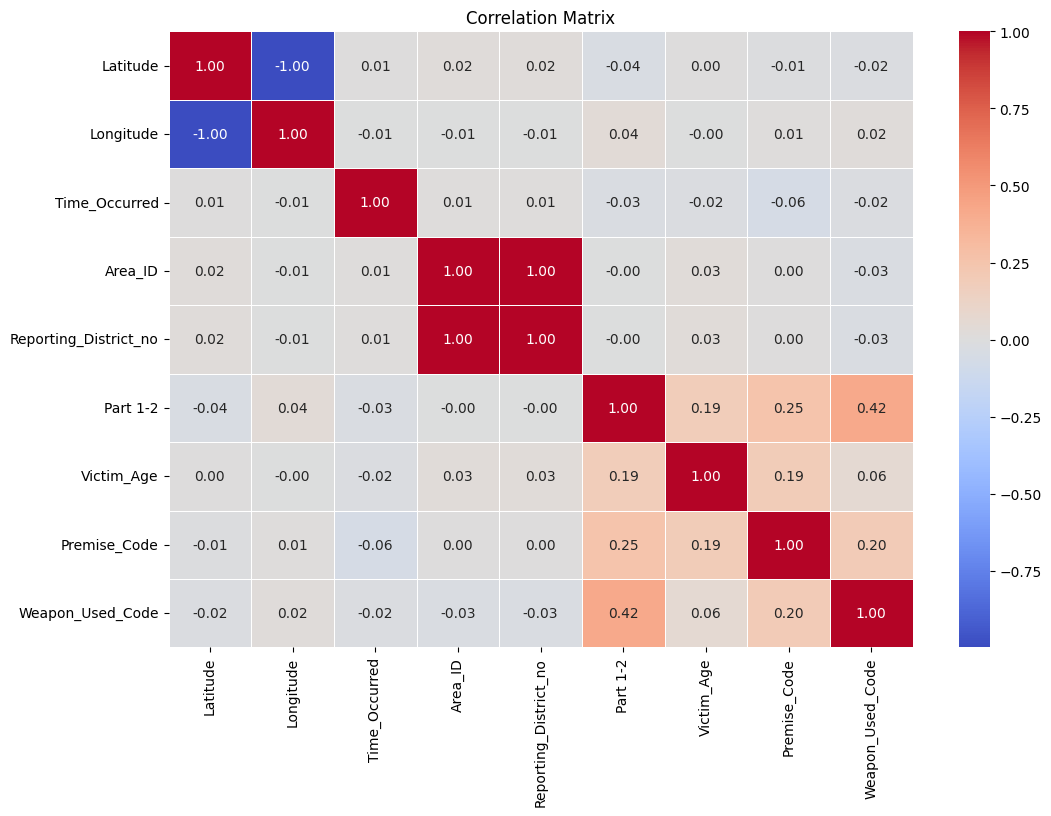

In [18]:
n_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = n_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Detecting missing values

In [19]:
# Checking the shape 
train_data.shape

(20000, 22)

**Lets seperate the labels column that is `Crime_Category` in our case**

In [20]:
td = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
features = td.drop('Crime_Category' , axis = 1) # axis = 0 means row , and axis = 1 is columns
labels = td['Crime_Category'].copy()

In [21]:
labels.value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [22]:
print("Shape of features are :" , features.shape)
print("Shape of label are :" , labels.shape)

Shape of features are : (20000, 21)
Shape of label are : (20000,)


**Now lets check the columns that contains null values**

In [23]:
null_value = features.isnull().sum()
for column, count in null_value.items():
    if count > 0:
        print(column,":", count)


Cross_Street : 16552
Modus_Operandi : 2741
Victim_Sex : 2624
Victim_Descent : 2624
Premise_Description : 5
Weapon_Used_Code : 12665
Weapon_Description : 12665


**Based on the observation on heat map and data we are droping the Column Cross_Street as it contains a lot of missing values , we can also see that Premise_Description and Premise code are same (One is encode and other is not) so drop that also as it is a duplicate column with diffrent datatype , similarly Weapon_Code and Weapon_Description are also same so dropping one of them and some other unwanted columns.**


# Preprocessing and Data Cleaning

## Will load the data Again to remove any ambiguity

In [24]:
data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test =  pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

Spliting the test and train data

In [25]:
x = data.drop('Crime_Category', axis = 1)
y = data["Crime_Category"].copy()

Applying MultiLabelBinarizer on the Modus_Oprendi Column

In [26]:

from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd

class CustomMultiLabelBinarizer:
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X):
        # Replace missing values with empty strings and split text into lists of words
        X_processed = X.fillna(' ').apply(lambda x: x.split())
        self.mlb.fit(X_processed)

    def transform(self, X):
        # Replace missing values with empty strings and split text into lists of words
        X_processed = X.fillna(' ').apply(lambda x: x.split())
        return self.mlb.transform(X_processed)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

custom_mlb = CustomMultiLabelBinarizer()

# Fit and transform on training data
train_mo = custom_mlb.fit_transform(x['Modus_Operandi'])

# Transform test data using the same instance
test_mo = custom_mlb.transform(test['Modus_Operandi'])
print(train_mo.shape)
print(test_mo.shape)

(20000, 481)
(5000, 481)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['0218', '0306', '0320', '0393', '0403', '0518', '0540', '0854', '1011', '1231', '1255', '1314', '2026', '2043', '2044', '2208', '2308', '3030'] will be ignored
  warnings.warn(


Converting the results from modus_oprendi transformation to Pandas DataFrame

In [27]:
test_mo_df = pd.DataFrame(test_mo)
train_mo_df = pd.DataFrame(train_mo)

**Dropping Unwanted and duplicates columns**

In [28]:
train_df = x.drop(columns = ["Modus_Operandi"] , axis = 1)
test_df = test.drop(columns = ["Modus_Operandi"] , axis = 1)
# ["Cross_Street" , "Area_Name" , "Premise_Description" , "Weapon_Description" , "Status_Description","Modus_Operandi"]

**Filling some of the missing values from our own analysis**

In [29]:
train_df.loc[(train_df['Part 1-2'] == 1) & (train_df['Status'] == 'IC'), 'Weapon_Used_Code'] = train_df['Weapon_Used_Code'].fillna(12)

train_df.Weapon_Used_Code.value_counts()
train_df

# for test
test_df.loc[(test_df['Part 1-2'] == 1) & (test_df['Status'] == 'IC'), 'Weapon_Used_Code'] = test_df['Weapon_Used_Code'].fillna(12)

**Preprocessing (Using column transformers , custom functions and pipeline )**

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, FunctionTransformer , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Function to split and apply MultiLabelBinarizer
# def modus_operandi_transform(X):
#     mlb = MultiLabelBinarizer()
#     mo_1 = X.fillna(' ')
#     mo_2 = mo_1.apply(lambda x: x.split())
#     mo_f = (mlb.fit_transform(mo_2))
#     return  (mo_f )

def l_encoder(X):
    label_encoder = LabelEncoder()
    return  (label_encoder.fit_transform(X).reshape(-1,1))

def victim_age_imputation(X):
    median_age = X[X > 0].median()
    corrected_age = X.apply(lambda x: median_age if x <= 0 else x)
    return corrected_age.values.reshape(-1, 1)


def extracting_date_features(X):
    X = pd.to_datetime(X,format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    features = np.column_stack([
        X.dt.year,
        X.dt.month,
        X.dt.day,
        X.dt.dayofweek
    ])
    return (features)

def extracting_hour(X):
    time_string = X.astype(int).astype(str).str.zfill(4)
    return time_string.str[:2].astype(int).values.reshape(-1, 1)

def extracting_minute(X):
    time_string = X.astype(int).astype(str).str.zfill(4)
    return time_string.str[2:].astype(int).values.reshape(-1, 1)

# def modus_operandi_dummies(X):
#     return X.str.get_dummies(' ')

# Define transformers
'''
imputing = ColumnTransformer(
    transformers=[
        # ('modus_operandi', FunctionTransformer(modus_operandi_transform, validate=False), 'Modus_Operandi'),
        ('status', FunctionTransformer(l_encoder , validate=False), 'Status'),
        ('area_id', FunctionTransformer(lambda x: x.astype(int), validate=False), ['Area_ID']),
        ('victim_age', Pipeline([
            ('imputation' , FunctionTransformer(victim_age_imputation , validate=False)),
            ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]),'Victim_Age'),
        ('victim_sex',Pipeline([
             ('imputation' , SimpleImputer(strategy='constant', fill_value='M')),
             ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]) ,['Victim_Sex']),
        ('victim_descent',Pipeline([
            ('imputation' , SimpleImputer(strategy='constant', fill_value='W')),
            ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]), ['Victim_Descent']),
        ('date_occurred', FunctionTransformer(extracting_date_features, validate=False), 'Date_Occurred'),
        ('date_reported', FunctionTransformer(extracting_date_features, validate=False), 'Date_Reported'),
        ('hour_occurred', FunctionTransformer(extracting_hour, validate=False), 'Time_Occurred'),
        ('minute_occurred', FunctionTransformer(extracting_minute, validate=False), 'Time_Occurred'),
        ('scaling_lat' , StandardScaler() , ['Latitude']),
        ('scaling_long' , StandardScaler() , ['Longitude']),
        ('part 1-2', FunctionTransformer(lambda x: x.astype(int), validate=False), ['Part 1-2']),
        ('wepon_used_code',Pipeline([
            ('imputation' , SimpleImputer(strategy='constant', fill_value=2345)),
            ('encoding' , FunctionTransformer(lambda x: x.astype(int), validate=False))
        ]), ['Weapon_Used_Code']),
    ],
    remainder= 'drop'
)
'''

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, FunctionTransformer , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Function to split and apply MultiLabelBinarizer
def modus_operandi_transform(X):
    mlb = MultiLabelBinarizer()
    mo_1 = X.fillna(' ')
    mo_2 = mo_1.apply(lambda x: x.split())
    mo_f = (mlb.fit_transform(mo_2))
    return  (mo_f )

def l_encoder(X):
    label_encoder = LabelEncoder()
    return  (label_encoder.fit_transform(X).reshape(-1,1))

def victim_age_imputation(X):
    median_age = X[X > 0].median()
    corrected_age = X.apply(lambda x: median_age if x <= 0 else x)
    return corrected_age.values.reshape(-1, 1)


def extracting_date_features(X):
    X = pd.to_datetime(X,format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    features = np.column_stack([
        X.dt.year,
        X.dt.month,
        X.dt.day,
        X.dt.dayofweek
    ])
    return (features)

def extracting_hour(X):
    time_str = X.astype(int).astype(str).str.zfill(4)
    return time_str.str[:2].astype(int).values.reshape(-1, 1)

def extracting_minute(X):
    time_str = X.astype(int).astype(str).str.zfill(4)
    return time_str.str[2:].astype(int).values.reshape(-1, 1)

def modus_operandi_dummies(X):
    return X.str.get_dummies(' ')

# Define transformers
imputing = ColumnTransformer(
    transformers=[
        # ('modus_operandi', FunctionTransformer(modus_operandi_transform, validate=False), 'Modus_Operandi'),
        ('status', FunctionTransformer(l_encoder , validate=False), 'Status'),
        ('area_id', FunctionTransformer(l_encoder, validate=False), ['Area_ID']),
        ('victim_age', Pipeline([
            ('imputation' , FunctionTransformer(victim_age_imputation , validate=False)),
            ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]),'Victim_Age'),
        ('victim_sex',Pipeline([
             ('imputation' , SimpleImputer(strategy='constant', fill_value='F')),
             ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]) ,['Victim_Sex']),
        ('victim_descent',Pipeline([
            ('imputation' , SimpleImputer(strategy='constant', fill_value='W')),
            ('encoding' , OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
        ]), ['Victim_Descent']),
        ('date_occurred', FunctionTransformer(extracting_date_features, validate=False), 'Date_Occurred'),
        ('date_reported', FunctionTransformer(extracting_date_features, validate=False), 'Date_Reported'),
        ('hour_occurred', FunctionTransformer(extracting_hour, validate=False), 'Time_Occurred'),
        ('minute_occurred', FunctionTransformer(extracting_minute, validate=False), 'Time_Occurred'),
        ('scaling_lat' , StandardScaler() , ['Latitude']),
        ('scaling_long' , StandardScaler() , ['Longitude']),
        ('part 1-2', FunctionTransformer(l_encoder, validate=False), ['Part 1-2']),
        ('wepon_used_code',Pipeline([
            ('imputation' , SimpleImputer(strategy='constant', fill_value=0)),
            ('encoding' , FunctionTransformer(lambda x: x.astype(int), validate=False))
        ]), ['Weapon_Used_Code']),
        ("reporting_district_no", FunctionTransformer(l_encoder, validate=False), ["Reporting_District_no"]),
        ("premise_Code", FunctionTransformer(l_encoder, validate=False), ["Premise_Code"]),
    ],
    remainder= 'drop'
)

pipeline = Pipeline(steps=[
    ('imputation', imputing)
])
pipeline.fit(train_df)


pipeline = Pipeline(steps=[
    ('imputation', imputing) #,
    #('select_k_best', SelectKBest(score_func=f_classif, k=50))  # 55 , 65 , 70 , 100 , 120 
])
pipeline.fit(train_df)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Pipeline(steps=[('imputation',
                 ColumnTransformer(transformers=[('status',
                                                  FunctionTransformer(func=<function l_encoder at 0x7fe118f3f2e0>),
                                                  'Status'),
                                                 ('area_id',
                                                  FunctionTransformer(func=<function l_encoder at 0x7fe118f3f2e0>),
                                                  ['Area_ID']),
                                                 ('victim_age',
                                                  Pipeline(steps=[('imputation',
                                                                   FunctionTransformer(func=<function victim_age_imputation at 0x7fe118f3ef80>)),
                                                                  (...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fe118f3f370>))]),
                                                  ['Weapon_Used_Code']),
                                                 ('reporting_district_no',
                                                  FunctionTransformer(func=<function l_encoder at 0x7fe118f3f2e0>),
                                                  ['Reporting_District_no']),
                                                 ('premise_Code',
                                                  FunctionTransformer(func=<function l_encoder at 0x7fe118f3f2e0>),
                                                  ['Premise_Code'])]))])

Transforming the test and train data frame

In [31]:
p_train = pd.DataFrame(pipeline.fit_transform(train_df))
p_test = pd.DataFrame(pipeline.transform(test_df))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [32]:
p_train.shape

(20000, 136)

Adding the modus_oprendi transformation with the transformed dataframe

In [33]:

final_train =  pd.concat([p_train, train_mo_df], axis=1)
final_test =  pd.concat([p_test, test_mo_df], axis=1)

Encoding labels (y)

In [34]:
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

#decoded_labels = label_encoder_y.inverse_transform(encoded_labels)

## Spliting the data into test and train set for traning the model and testing the models performance

In [35]:
x_train, x_test, y_train, y_test = train_test_split(final_train, y_encoded, test_size=0.0005, random_state=256 , shuffle=True , stratify= y_encoded)

In [36]:
#x_train, x_test, y_train, y_test = train_test_split(final_train, y_encoded, test_size=0.01, random_state=42 , shuffle=True , stratify= y_encoded)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Converting to numpy array also

In [37]:
# Put all models 

# Model Building

## Decision Tree Classifier

In [38]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

y_pred = dt_clf.predict(x_test)
dt_clf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",dt_clf_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 6 0]
 [0 0 0 2]]


In [39]:
# Dt_Clf with parameter tunning 
param_grid = {
    'criterion': ['gini'], # 'log_loss' 'entropy'],            
    'splitter': ['best'], # 'random'],              
    'max_depth': [None, 10,], # 3,5,7,9,10,,17 20, 30, 40, 50],     
    'min_samples_split': [2, 5, 10, 20],       
    'min_samples_leaf': [30 , 31 ], # 1, 2, 5, 10 , 15 , 20 , 25 , 28 , 29 , 32 , 33],          
    'max_features': ['auto'], # 'None', 'sqrt', 'log2'],                 
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Fitting 2 folds for each of 16 candidates, totalling 32 fits


/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 31, 'min_samples_split': 10, 'splitter': 'best'}
Best Score: 0.8113056528264132


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

# cw = cw = {4: 0.2857306131778959, 5: 0.6992518005733864, 1: 1.8436578171091444, 2: 2.4600246002460024, 0: 14.814814814814815, 3: 18.6219739292365}
random_forest_classifier = RandomForestClassifier(random_state=42) #  , class_weight=cw)
random_forest_classifier.fit(x_train, y_train)


y_pred = random_forest_classifier.predict(x_test)

rf_clf_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {rf_clf_accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# With class weights acc : 0.94

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 6 0]
 [0 0 0 2]]


In [41]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],#, 200, 300],
    'max_depth': [None ],# 10, 20, 30],
    'min_samples_split': [2], #, 5, 10],
    'min_samples_leaf': [1],# 2, 4],
    'max_features': ['sqrt']# 'auto', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)


print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

'''
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9418181818181819
'''


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9406703351675838


"\nBest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}\nBest Score: 0.9418181818181819\n"

## XGBoost Classifier

In [42]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgb_classifier = XGBClassifier(max_depth= 4, n_estimators= 120)

xgb_classifier.fit(x_train, y_train)


y_pred = xgb_classifier.predict(x_test)
xgb_clf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_clf_accuracy)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 6 0]
 [0 0 0 2]]


In [43]:
'''
param_grid = {
    'n_estimators': [120 ] , # 50, 100, 200, 110 , 115 , 118 ,119 , 121 , 122 , 125],        
    'max_depth': [ 4 ] , #  3, 5,6,8, 7, 10],                  
    #'learning_rate': [ 0.3],   # 0.01, 0.1, 0.2,           
    #'reg_alpha': [0, 0.01], # 0.1, 1],              # L1 regularization term on weights
    #'reg_lambda': [0, 0.01], # 0.1, 1],             # L2 regularization term on weights
    #'scale_pos_weight': [1] #, 2, 5]                
}


grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)


print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
'''
"""
Best Parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 120, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'scale_pos_weight': 1}
Best Score: 0.9521212121212121
"""


"\nBest Parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 120, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'scale_pos_weight': 1}\nBest Score: 0.9521212121212121\n"

## Light GBM

In [44]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming x_train, x_test, y_train, y_test are already defined

# Initialize the LGBMClassifier with desired hyperparameters
lgbm_classifier = LGBMClassifier( n_estimators=150 , verbose = -1)

# Train the classifier on the training data
lgbm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = lgbm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 6 0]
 [0 0 0 2]]


## Model Comparision

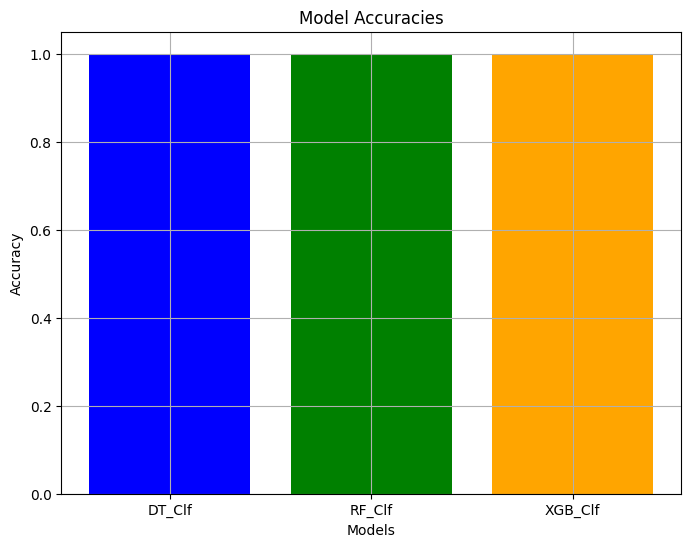

In [45]:
models = ["DT_Clf" , "RF_Clf" , "XGB_Clf"]
models_acc = [dt_clf_accuracy,rf_clf_accuracy,xgb_clf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, models_acc, color=['blue', 'green', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

# Making Submission

Converting the processed test set to numpy array

In [46]:
finall_test = final_test.to_numpy()

Seclecting the best classifier manually

In [47]:
encoded_label = lgbm_classifier.predict(finall_test)
label_decoding = label_encoder_y.inverse_transform(encoded_label)
# Create submission dataframe range(1, len(labb) + 1)
submission_df = pd.DataFrame({'ID': range(1, 5000 + 1), 'Crime_Category': label_decoding})

# Save submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Checking the output

In [48]:
submission_df['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  2921
Violent Crimes                   1244
Crimes against Public Order       450
Fraud and White-Collar Crimes     333
Crimes against Persons             28
Other Crimes                       24
Name: count, dtype: int64